In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')
df.head(10)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,1,8.9,3,0,1,0,0,0,0


Análise Exploratória

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


- 13 colunas sendo todas numéricas 
- Nenhum valor nulo
- 5000 linhas 

In [7]:
df.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Definindo minhas features e target 

In [16]:
# x = todas minhas colunas exceto a coluna target ('Personal_Loan)
x = df.iloc[:, df.columns != 'Personal_Loan']

# y = 'Personal Loan
y = df['Personal_Loan']

Train-test-split

In [18]:
# Definindo variáveis de treino e teste 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42, stratify=y)

Regressão Logistica

In [24]:
# Importando a lib e definindo 
from sklearn.linear_model import LogisticRegression

#Treinando
rl = LogisticRegression()
rl.fit(x_train, y_train)

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
#Fazendo a predição 
rl.predict(x_test);

In [35]:
#Jutando minha target com meus dados reais 
x_test.assign(Personal_Loan = y_test).assign(Prediçao = rl.predict(x_test))

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan,Prediçao
2388,2389,64,39,23,3,0.5,1,0,1,0,0,0,0,0
2373,2374,33,9,184,2,4.8,2,0,0,0,0,0,1,1
4347,4348,58,33,22,3,0.2,1,0,0,0,1,0,0,0
665,666,54,24,61,4,2.0,3,0,1,0,1,0,0,0
4182,4183,55,29,49,2,0.8,3,220,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,1591,49,23,58,4,2.6,1,188,0,0,0,0,0,0
4986,4987,32,6,78,1,2.9,3,0,0,0,0,0,0,0
433,434,52,28,31,4,0.2,1,141,0,0,1,1,0,0
1821,1822,32,7,54,4,1.3,1,0,1,0,1,0,0,0


Matriz de Confusão 

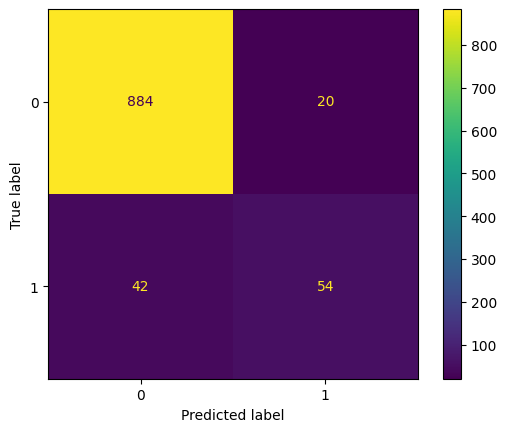

In [38]:
#Importando libs da matriz confusão 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#Plotando
ConfusionMatrixDisplay.from_estimator(rl, x_test, y_test )


Logo nosso modelo previu: 
 - Previu 884 emprestimos concedidos corretamente.
 - Previu 54 emprestimos que não foram concedidos corretamente.
 - Previu 20 vezes emprestimos concedidos incorretamente.
 - Previu 42 vezez incorretamente emprestimos que não foram concedidos.

Métricas 

In [43]:
#Importando lib 
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Printando métricas
print(f"Acurácia (Treino): {accuracy_score(y_train, rl.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rl.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rl.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rl.predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rl.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, rl.predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rl.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, rl.predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rl.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rl.predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rl.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rl.predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.93825
Acurácia (Teste): 0.938
Acurácia Balanceada (Treino): 0.7575244284660767
Acurácia Balanceada (Teste): 0.7701880530973451
Precision (Treino): 0.7509157509157509
Precision (Teste): 0.7297297297297297
Recall (Treino): 0.5338541666666666
Recall (Teste): 0.5625
F1-Score (Treino): 0.624048706240487
F1-Score (Teste): 0.6352941176470588
ROCAUC (Treino): 0.9409215696441741
ROCAUC (Teste): 0.9554641408554572


Curva ROC

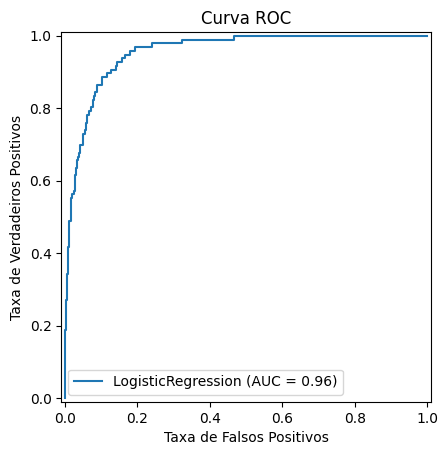

In [49]:
#Importando lib
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

#Plotando o gráfico de curva roc 
RocCurveDisplay.from_estimator(rl, x_test, y_test);

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()


In [80]:
metricas = { 'Model' : ['Logistic Regression', 'Logistic Regression'],
            'Modo' : ['Treino', 'Teste'],
            'Acuracy': [accuracy_score(y_train, rl.predict(x_train)), accuracy_score(y_test, rl.predict(x_test))],
            'Balanced Score' : [balanced_accuracy_score(y_train,rl.predict(x_train)), balanced_accuracy_score(y_test, rl.predict(x_test))],
            'Precision' :[precision_score(y_train, rl.predict(x_train)), precision_score(y_test, rl.predict(x_test))],
            'Recall' :[recall_score(y_train, rl.predict(x_train)), recall_score(y_test, rl.predict(x_test))],
            'F1 Score' : [f1_score(y_train, rl.predict(x_train)), f1_score(y_test, rl.predict(x_test))],
            'Rocauc' : [roc_auc_score(y_train, rl.predict_proba(x_train)[:,1]), roc_auc_score(y_test, rl.predict_proba(x_test)[:,1])]
}

pd.DataFrame(metricas)


,Model,Modo,Acuracy,Balanced Score,Precision,Recall,F1 Score,Rocauc
0,Logistic Regression,Treino,0.93825,0.757524,0.750916,0.533854,0.624049,0.940922
1,Logistic Regression,Teste,0.93800,0.770188,0.729730,0.562500,0.635294,0.955464
